[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://github.com/roboflow/notebooks)

# Zero-Shot Object Detection with Grounding DINO

---

[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/zero-shot-object-detection-with-grounding-dino.ipynb) [![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/IDEA-Research/GroundingDINO) [![arXiv](https://img.shields.io/badge/arXiv-2303.05499-b31b1b.svg)](https://arxiv.org/abs/2303.05499)

Grounding DINO can detect **arbitrary objects** with human inputs such as category names or referring expressions. The key solution of open-set object detection is introducing language to a closed-set detector DINO. for open-set concept generalization. If you want to learn more visit official GitHub [repository](https://github.com/IDEA-Research/GroundingDINO) and read the [paper](https://arxiv.org/abs/2303.05499).

![grounding dino figure](https://media.roboflow.com/notebooks/examples/grounding-dino-figure.png)

## Complementary Materials

---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/grounding-dino-zero-shot-object-detection) [![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/cMa77r3YrDk)

We recommend that you follow along in this notebook while reading the blog post on Grounding DINO. We will talk about the advantages of Grounding DINO, analyze the model architecture, and provide real prompt examples.

![grounding dino](https://media.roboflow.com/notebooks/examples/grounding-dino.png)

## ⚠️ Disclaimer

Grounding DINO codebase is still under development. If you experience any problems with launching the notebook, please let us know and create [issues](https://github.com/roboflow/notebooks/issues) on our GitHub.

## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.

## Steps in this Tutorial

In this tutorial, we are going to cover:

- Before you start
- Install Grounding DINO 🦕
- Download Grounding DINO Weights 🏋️
- Download Example Data
- Load Grounding DINO Model
- Grounding DINO Demo
- Grounding DINO with Roboflow Dataset
- 🏆 Congratulations

**Let's begin!**

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 216, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 216 (delta 95), reused 171 (delta 58), pack-reused 0
Receiving objects: 100% (216/216), 8.74 MiB | 10.68 MiB/s, done.
Resolving deltas: 100% (95/95), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.2/190.2 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (set

In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

In [ ]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Grounding DINO Demo

/usr/local/lib/python3.9/dist-packages/transformers/modeling_utils.py:830: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


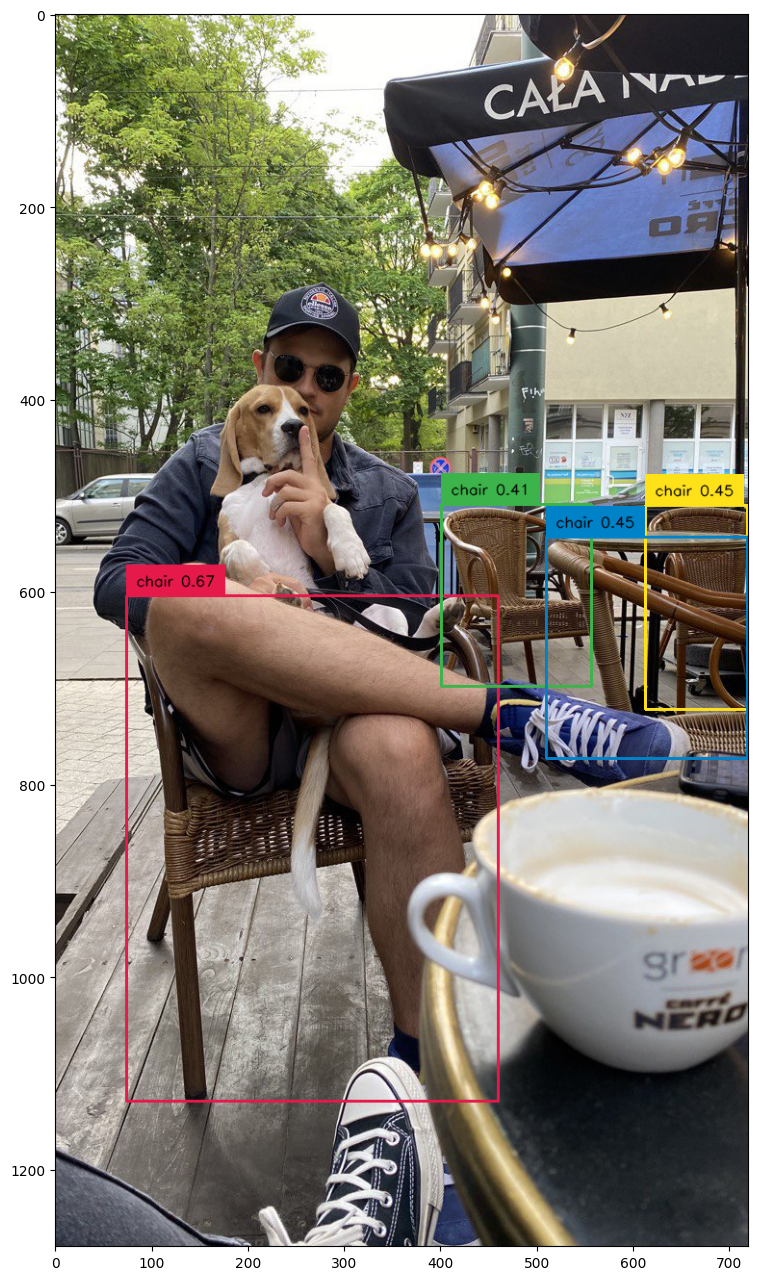

In [ ]:
import os
import cv2
import shutil
import random
from groundingdino.util.inference import load_model, load_image, predict, annotate

# Paths for configuration and model weights
CONFIG_PATH = '/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT.py'
WEIGHTS_PATH = '/content/GroundingDINO/checkpoints/groundingdino_swinT.pth'

# Load Grounding DINO model
model = load_model(CONFIG_PATH, WEIGHTS_PATH)

# Paths to input, output images, and labels
INPUT_FOLDER = '/content/drive/MyDrive/Pallets_Resized/'  # Resized images
OUTPUT_IMAGES_FOLDER = '/content/drive/MyDrive/pallets_kill/images/'  # Folder for annotated images
OUTPUT_LABELS_FOLDER = '/content/drive/MyDrive/pallets_kill/labels/'  # Folder for YOLO labels
os.makedirs(OUTPUT_IMAGES_FOLDER, exist_ok=True)
os.makedirs(OUTPUT_LABELS_FOLDER, exist_ok=True)

# Prediction settings
TEXT_PROMPT = "pallet, ground"
BOX_THRESHOLD = 0.22
TEXT_THRESHOLD = 0.09

# Step 1: Annotate Images and Generate YOLO Labels
for image_name in os.listdir(INPUT_FOLDER):
    if not image_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    # Paths for current image, output image, and output label
    image_path = os.path.join(INPUT_FOLDER, image_name)
    output_image_path = os.path.join(OUTPUT_IMAGES_FOLDER, image_name)
    label_file_path = os.path.join(OUTPUT_LABELS_FOLDER, f"{os.path.splitext(image_name)[0]}.txt")

    # Load the image
    image_source, image = load_image(image_path)
    img_height, img_width = image.shape[:2]

    # Run Grounding DINO for predictions
    boxes, logits, phrases = predict(
        model=model,
        image=image,
        caption=TEXT_PROMPT,
        box_threshold=BOX_THRESHOLD,
        text_threshold=TEXT_THRESHOLD
    )

    # Save the annotated images
    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
    annotated_frame_bgr = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_image_path, annotated_frame_bgr)

    # Open label file for writing annotations in YOLO format
    with open(label_file_path, 'w') as label_file:
        found_valid_box = False
        for box, label in zip(boxes, phrases):
            x_min, y_min, x_max, y_max = box

            # Clip bounding box coordinates within image bounds
            x_min = max(0, min(x_min, img_width - 1))
            y_min = max(0, min(y_min, img_height - 1))
            x_max = max(0, min(x_max, img_width - 1))
            y_max = max(0, min(y_max, img_height - 1))

            # Convert to YOLO format (x_center, y_center, width, height)
            x_center = ((x_min + x_max) / 2) / img_width
            y_center = ((y_min + y_max) / 2) / img_height
            width = (x_max - x_min) / img_width
            height = (y_max - y_min) / img_height

            # Ensure values are between 0 and 1
            x_center = max(0, min(x_center, 1))
            y_center = max(0, min(y_center, 1))
            width = max(0, min(width, 1))
            height = max(0, min(height, 1))

            # Assign class index based on the detected label
            if "pallet" in label.lower():
                class_index = 0
            elif "ground" in label.lower():
                class_index = 1
            else:
                continue

            # Write valid annotations
            if width > 0 and height > 0:
                label_file.write(f"{class_index} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
                found_valid_box = True

        # Delete empty label file if no valid bounding boxes
        if not found_valid_box:
            os.remove(label_file_path)

print("Annotations complete for all resized images.")

# Step 2: Split Dataset into Train, Validation, and Test Sets

# Define paths for split datasets
SPLIT_OUTPUT_FOLDER = '/content/drive/MyDrive/pallets_kill_split/'
os.makedirs(os.path.join(SPLIT_OUTPUT_FOLDER, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(SPLIT_OUTPUT_FOLDER, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(SPLIT_OUTPUT_FOLDER, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(SPLIT_OUTPUT_FOLDER, 'val/labels'), exist_ok=True)
os.makedirs(os.path.join(SPLIT_OUTPUT_FOLDER, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(SPLIT_OUTPUT_FOLDER, 'test/labels'), exist_ok=True)

# Get a list of all image names
images = [f for f in os.listdir(OUTPUT_IMAGES_FOLDER) if f.endswith(('.jpg', '.jpeg', '.png'))]
random.seed(42)  # Ensure reproducibility
random.shuffle(images)

# Define split ratios
train_split = int(0.7 * len(images))
val_split = int(0.85 * len(images))

train_images = images[:train_split]
val_images = images[train_split:val_split]
test_images = images[val_split:]

# Helper function to copy images and labels to respective folders
def copy_files(image_list, subset):
    for image_name in image_list:
        # Image paths
        image_src = os.path.join(OUTPUT_IMAGES_FOLDER, image_name)
        image_dst = os.path.join(SPLIT_OUTPUT_FOLDER, f'{subset}/images', image_name)
        shutil.copy(image_src, image_dst)

        # Label paths
        label_name = f"{os.path.splitext(image_name)[0]}.txt"
        label_src = os.path.join(OUTPUT_LABELS_FOLDER, label_name)
        if os.path.exists(label_src):
            label_dst = os.path.join(SPLIT_OUTPUT_FOLDER, f'{subset}/labels', label_name)
            shutil.copy(label_src, label_dst)

# Copy train, validation, and test sets to their respective directories
copy_files(train_images, 'train')
copy_files(val_images, 'val')
copy_files(test_images, 'test')

print("Dataset split into train, validation, and test sets successfully.")

## Grounding DINO with Roboflow Dataset

In [ ]:
%cd {HOME}

/content


**NOTE:** The design of the prompt is very important. Try to be as accurate as possible. Avoid abbreviations.